# Project - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# 🏢 Hotel Booking Demand - 📊 Data Analytics

<img src= "https://c4.wallpaperflare.com/wallpaper/20/164/15/booking-best-hotels-bangkok-tourism-wallpaper-preview.jpg" alt ="Titanic" style='width: 75%; margin-left: 12.5%
'>

# Table of Contents

1. [Data Understanding](#1.-Data-Understanding)
    - 1.1 [How many rows and columns of our data?](#1.1.-How-many-rows-and-columns-of-our-data?)
    - 1.2 [What is the meaning of each column?](#1.2.-What-is-the-meaning-of-each-column?)
    - 1.3 [Take 5 data points as a sample](#1.3.-Take-5-data-points-as-a-sample)
    - 1.4 [Missing value analysis](#1.4.-Missing-value-analysis)
    - 1.5 [Handle missing value](#1.5.-Handle-missing-value)
    - 1.6 [Duplicate value analysis](#1.6.-Duplicate-value-nalysis)
2. [EDA 1D](#2.-EDA-1D)
    - 2.1 [Split data in two type](#2.1.-Split-data-in-two-type)
    - 2.2 [Visualization of Categorical Data Distribution](#2.2.-Visualization-of-Categorical-Data-Distribution)
    - 2.3 [Distribution analysis for variable numerical](#2.3.-Distribution-analysis-for-variable-numerical)
3. [EDA 2D](#3.-EDA-2D)
    - 3.1 [Analyze correlation coefficients between numerical variables](#I.1.-Analyze-correlation-coefficients-between-numerical-variables)
    - 3.2 [Leverage Scatter plot to analyze 2D data](#3.2.-Leverage-Scatter-plot-to-analyze-2D-data)
    - 3.3 [Use bar charts to analyze data that combines numerical and categorical data](#3.3.-Use-bar-charts-to-analyze-data-that-combines-numerical-and-categorical-data)
    - 3.4 [Calculate the density for two categorical variables](#3.4.-Calculate-the-density-for-two-categorical-variables)
4. [EDA 3D](#IV.-EDA-3D)
    - 4.1 [3D data analysis for three numerical variables](#4.1.-3D-data-analysis-for-three-numerical-variables)
    - 4.2 [2D for two numerical and color for categorical variables](#4.2.-2D-for-two-numerical-and-color-for-categorical-variables)
    - 4.3 [Calculate proportion by bin divided by category with two cate variables](#4.3.-Calculate-proportion-by-bin-divided-by-category-with-two-cate-variables)
5. [Insights](#5.-Insights)
6. [References](#6.-References)

### Import necessary libraries

In [91]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding

In [92]:
df = pd.read_csv("data/hotel_bookings.csv")

#### 1.1. How many rows and columns of our data?

In [93]:
print("Shape:", df.shape)

Shape: (119390, 32)



This indicates that the dataset has `119390 rows` and `32 columns`.

#### 1.2. What is the meaning of each column?

There are total of __32__ columns in our dataset represent 32 features of each reservation, include:

| # | Field Name | Description |
|---|------------|-------------|
| 1 | `hotel` | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
| 2 | `is_canceled` | Value indicating if the booking was canceled (1) or not (0) |
| 3 | `lead_time` | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| 4 | `arrival_date_year` | Year of arrival date |
| 5 | `arrival_date_month` | Month of arrival date |
| 6 | `arrival_date_week_number` | Week number of year for arrival date |
| 7 | `arrival_date_day_of_month` | Day of arrival date |
| 8 | `stays_in_weekend_nights` | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| 9 | `stays_in_week_nights` | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| 10 | `adults` | Number of adults |
| 11 | `children` | Number of children |
| 12 | `babies` | Number of babies |
| 13 | `meal` | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal |
| 14 | `country` | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| 15 | `market_segment` | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| 16 | `distribution_channel` | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| 17 | `is_repeated_guest` | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| 18 | `previous_cancellations` | Number of previous bookings that were cancelled by the customer prior to the current booking |
| 19 | `previous_bookings_not_canceled` | Number of previous bookings not cancelled by the customer prior to the current booking |
| 20 | `reserved_room_type` | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| 21 | `assigned_room_type` | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due |
| 22 | `booking_changes` | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS |
| 23 | `deposit_type` | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No |
| 24 | `agent` | ID of the travel agency that made the booking |
| 25 | `company` | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for |
| 26 | `days_in_waiting_list` | Number of days the booking was in the waiting list before it was confirmed to the customer |
| 27 | `customer_type` | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of |
| 28 | `adr` | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| 29 | `required_car_parking_spaces` | Number of car parking spaces required by the customer |
| 30 | `total_of_special_requests` | Number of special requests made by the customer (e.g. twin bed or high floor) |
| 31 | `reservation_status` | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out |
| 32 | `reservation_status_date` | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to |

#### 1.3. Take 5 data points as a sample

In [94]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### 1.4. Missing value analysis

In [95]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- Looks like we have quite alot of `NaN` values in `company` and `agent`.Highly doubt they have an impact on the analysis and will remove the 2 columns.
- In the `country` attribute, it can be filled in with `Unknown` because the country of origin is unknown.
- In the `children` attribute, it is possible to fill in children data without a value of 0.

#### 1.5. Handle missing value

In [96]:
df = df.drop(columns = ['agent', 'company'])
df = df.fillna({
    'children' : 0,
    'country': 'Unknown',
})
   

During the process of observing the data, we discovered several lines of data that `adult = 0, children = 0, and babies = 0`. Therefore, such data lines should be discarded because no hotel can be booked with a guest count of 0.

In [97]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [98]:
any(df.isna().sum())

False

#### 1.6. Duplicate value analysis

In [99]:
df.duplicated().sum()

32006

As you can see, we have `31994` duplicate entries in the dataset, so now let's drop duplicate data

In [100]:
df = df.drop_duplicates()
len(df)

87204

In [101]:
df.shape

(87204, 30)

### 2. EDA 1D

#### 2.1 Split data in two type

First, we split df into two type: `numerical` and `categorical`

In [102]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])

In [103]:
numerical_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [104]:
categorical_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,9/6/2017
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,9/7/2017
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,9/7/2017
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,9/7/2017


#### 2.2. Visualization of Categorical Data Distribution

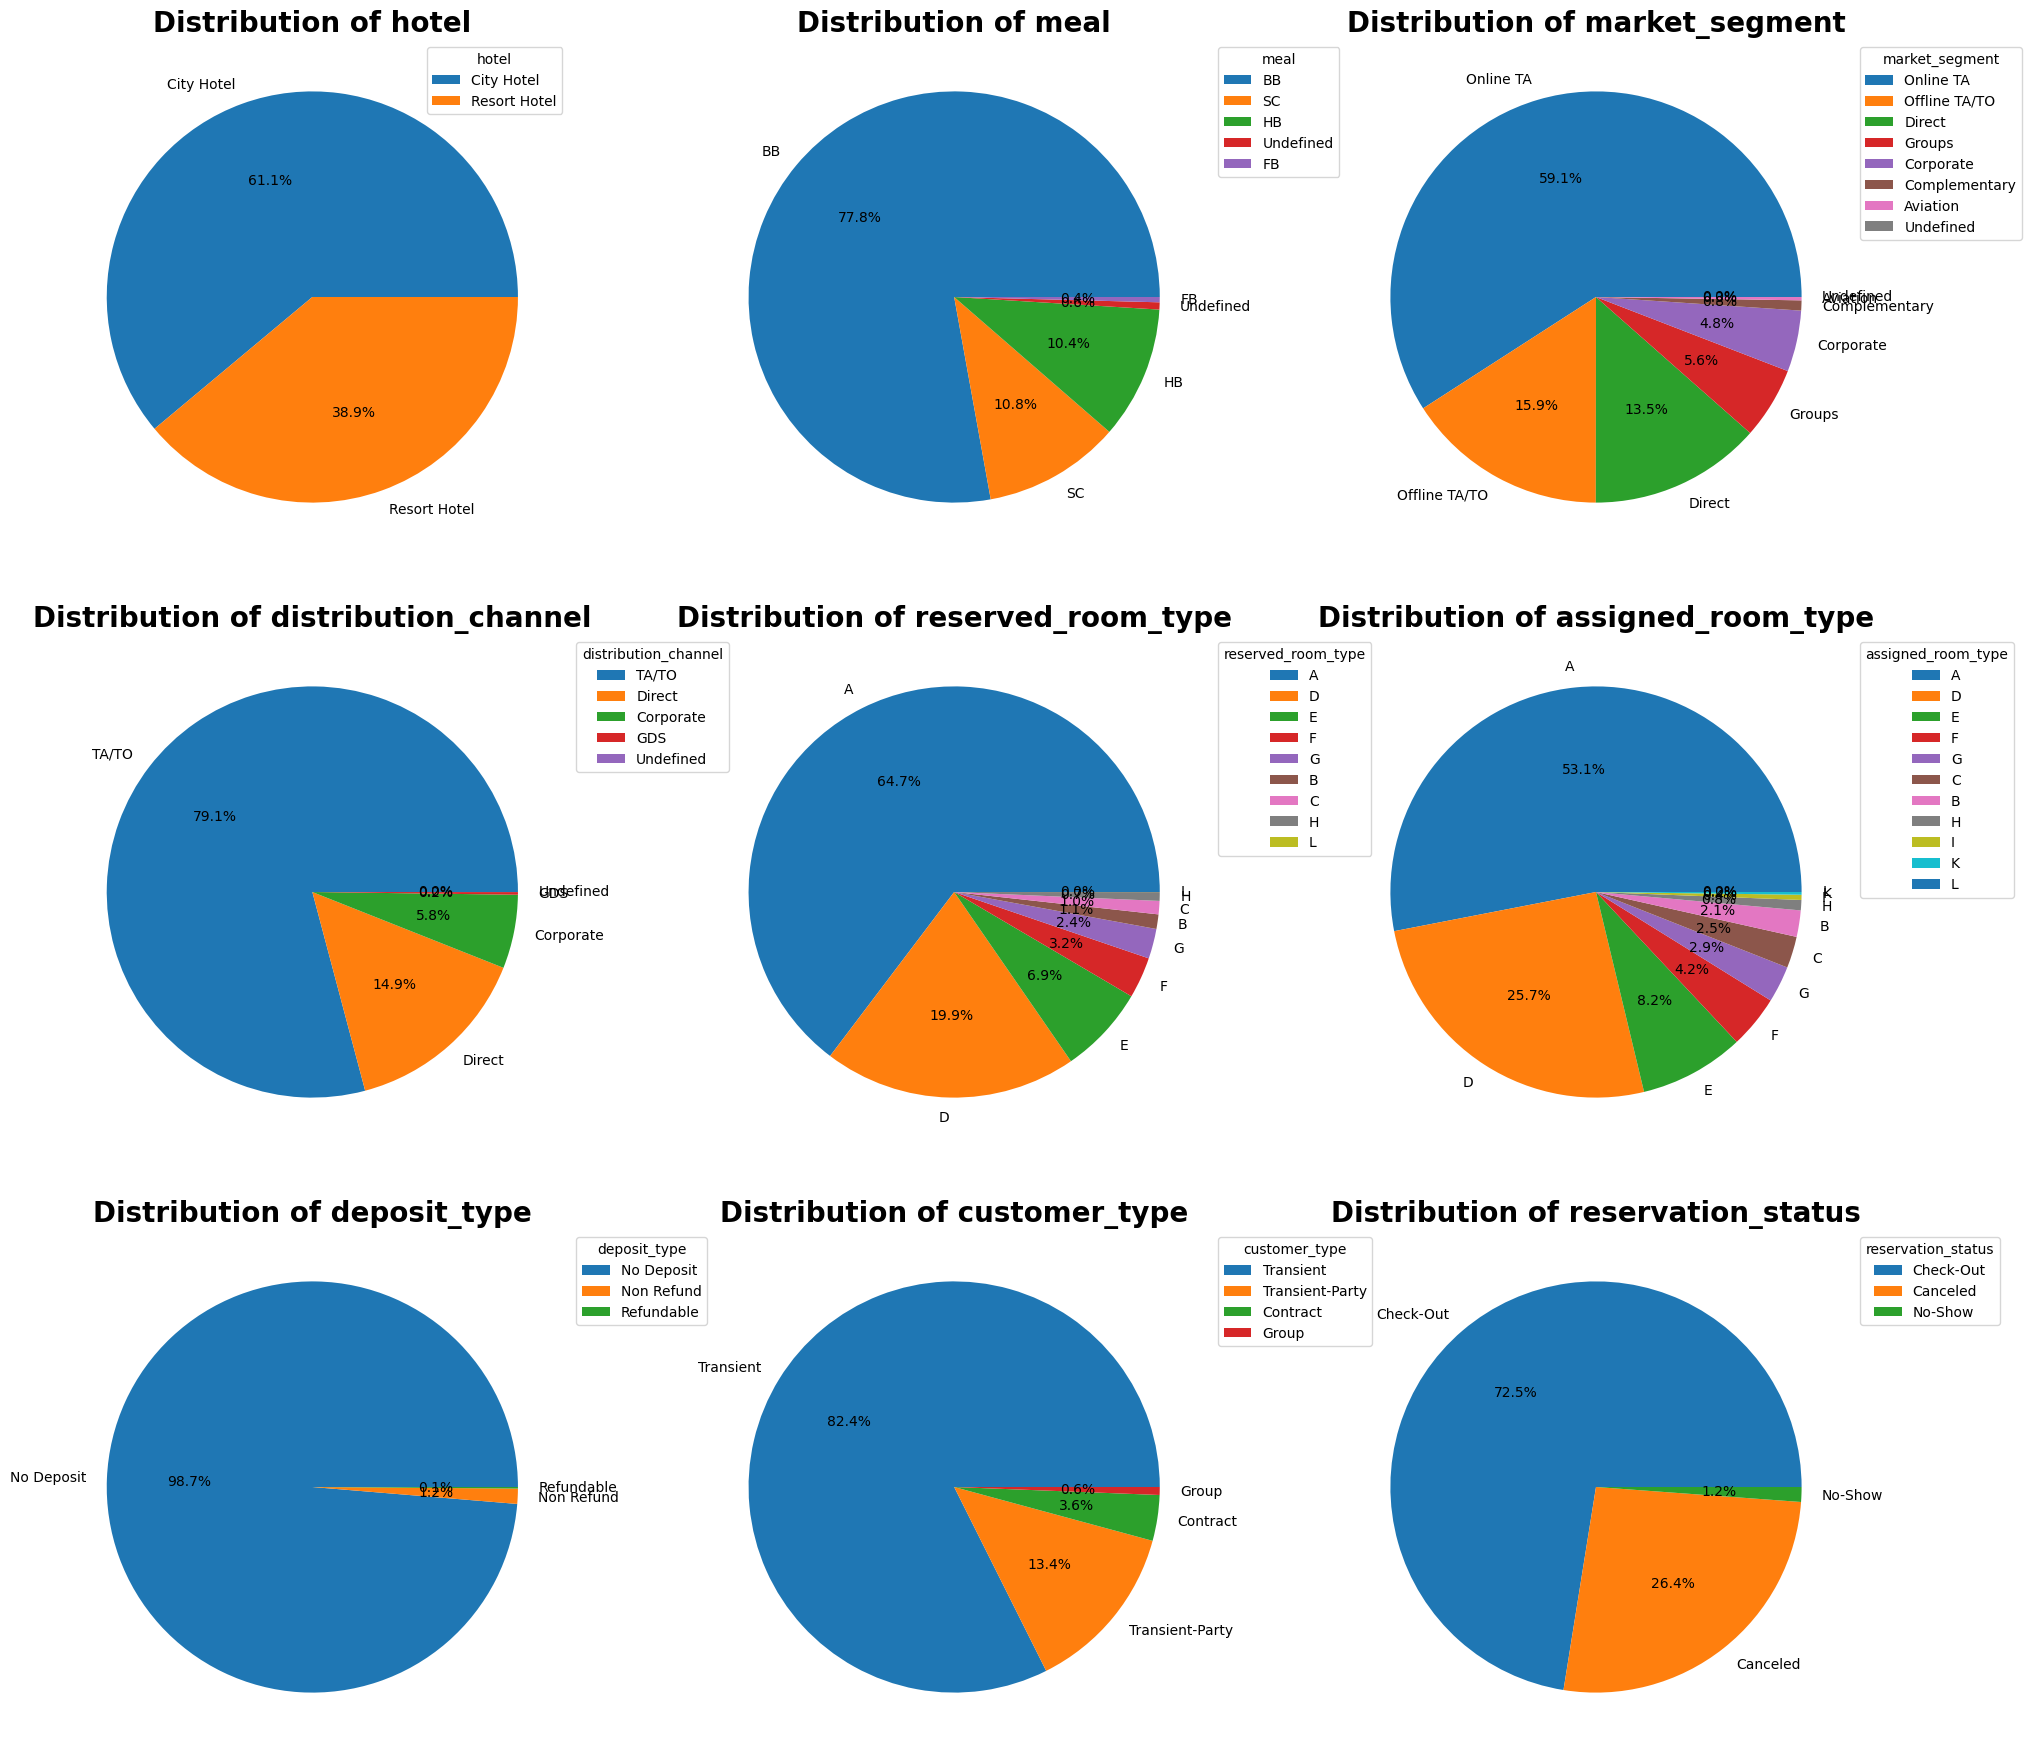

In [105]:
# Exclude specified columns
categorical_df_new = categorical_df.drop(columns=['reservation_status_date', 'arrival_date_month', 'country'])

# Determine the layout for the subplots
n = len(categorical_df_new.columns)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))

for ax, column in zip(axes.flatten(), categorical_df_new):
    categorical_df_new[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    ax.set_title(f'Distribution of {column}', fontsize=20, fontweight="bold")
    ax.set_ylabel('')
    ax.legend(title=column, bbox_to_anchor=(1,1))  # Add a legend for each pie chart

plt.tight_layout()
plt.show()

#### No. of bookings by `months`

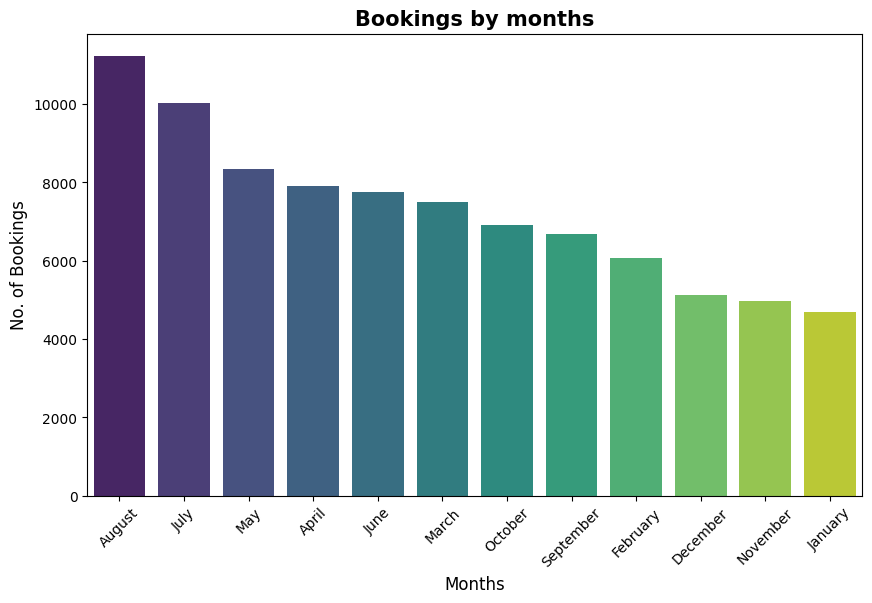

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].value_counts().index, palette='viridis')
plt.title('Bookings by months', fontsize=15, fontweight="bold")
plt.xlabel('Months', fontsize=12)
plt.ylabel('No. of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### No. of bookings by `country`

Top 20 countries by number of bookings

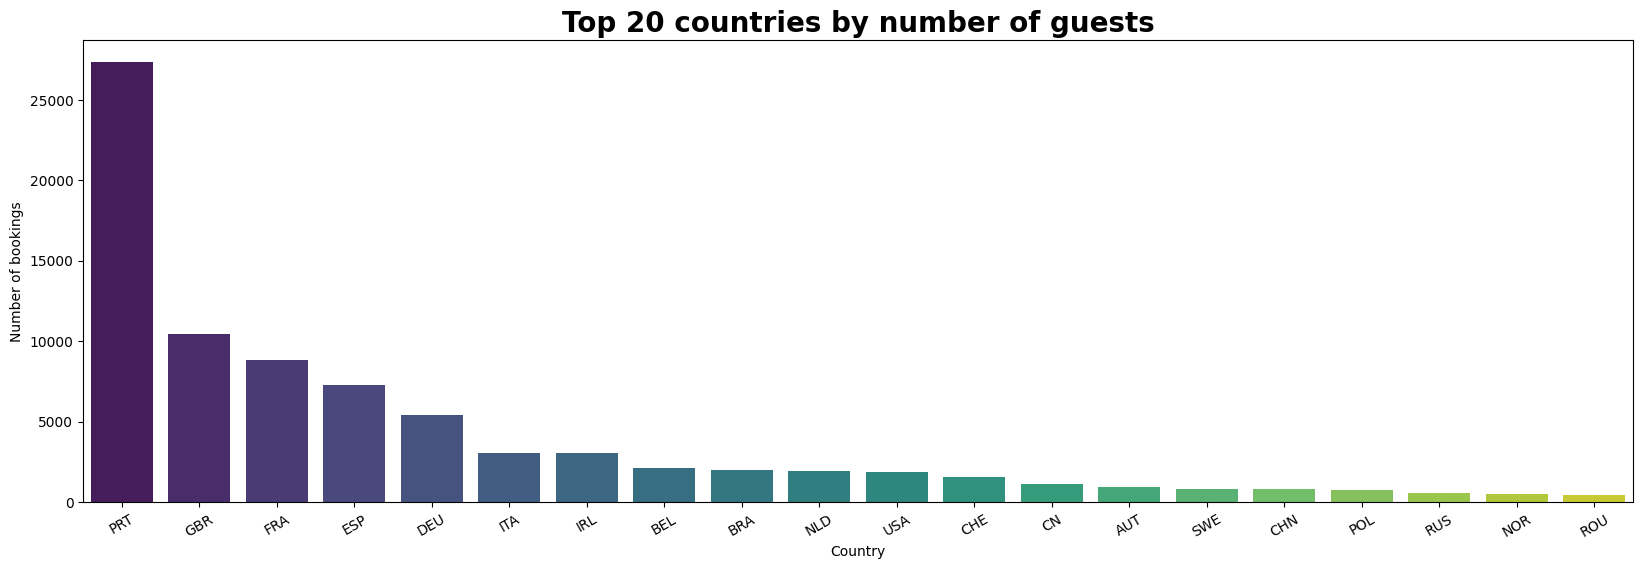

In [107]:
plt.figure(figsize=(20,6))
top_countries = df['country'].value_counts().nlargest(20).index
sns.countplot(data=df[df['country'].isin(top_countries)], x='country', order=top_countries, palette='viridis')
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title("Top 20 countries by number of guests", size=20, fontweight="bold")
plt.show()

#### 2.3. Distribution analysis for variable numerical

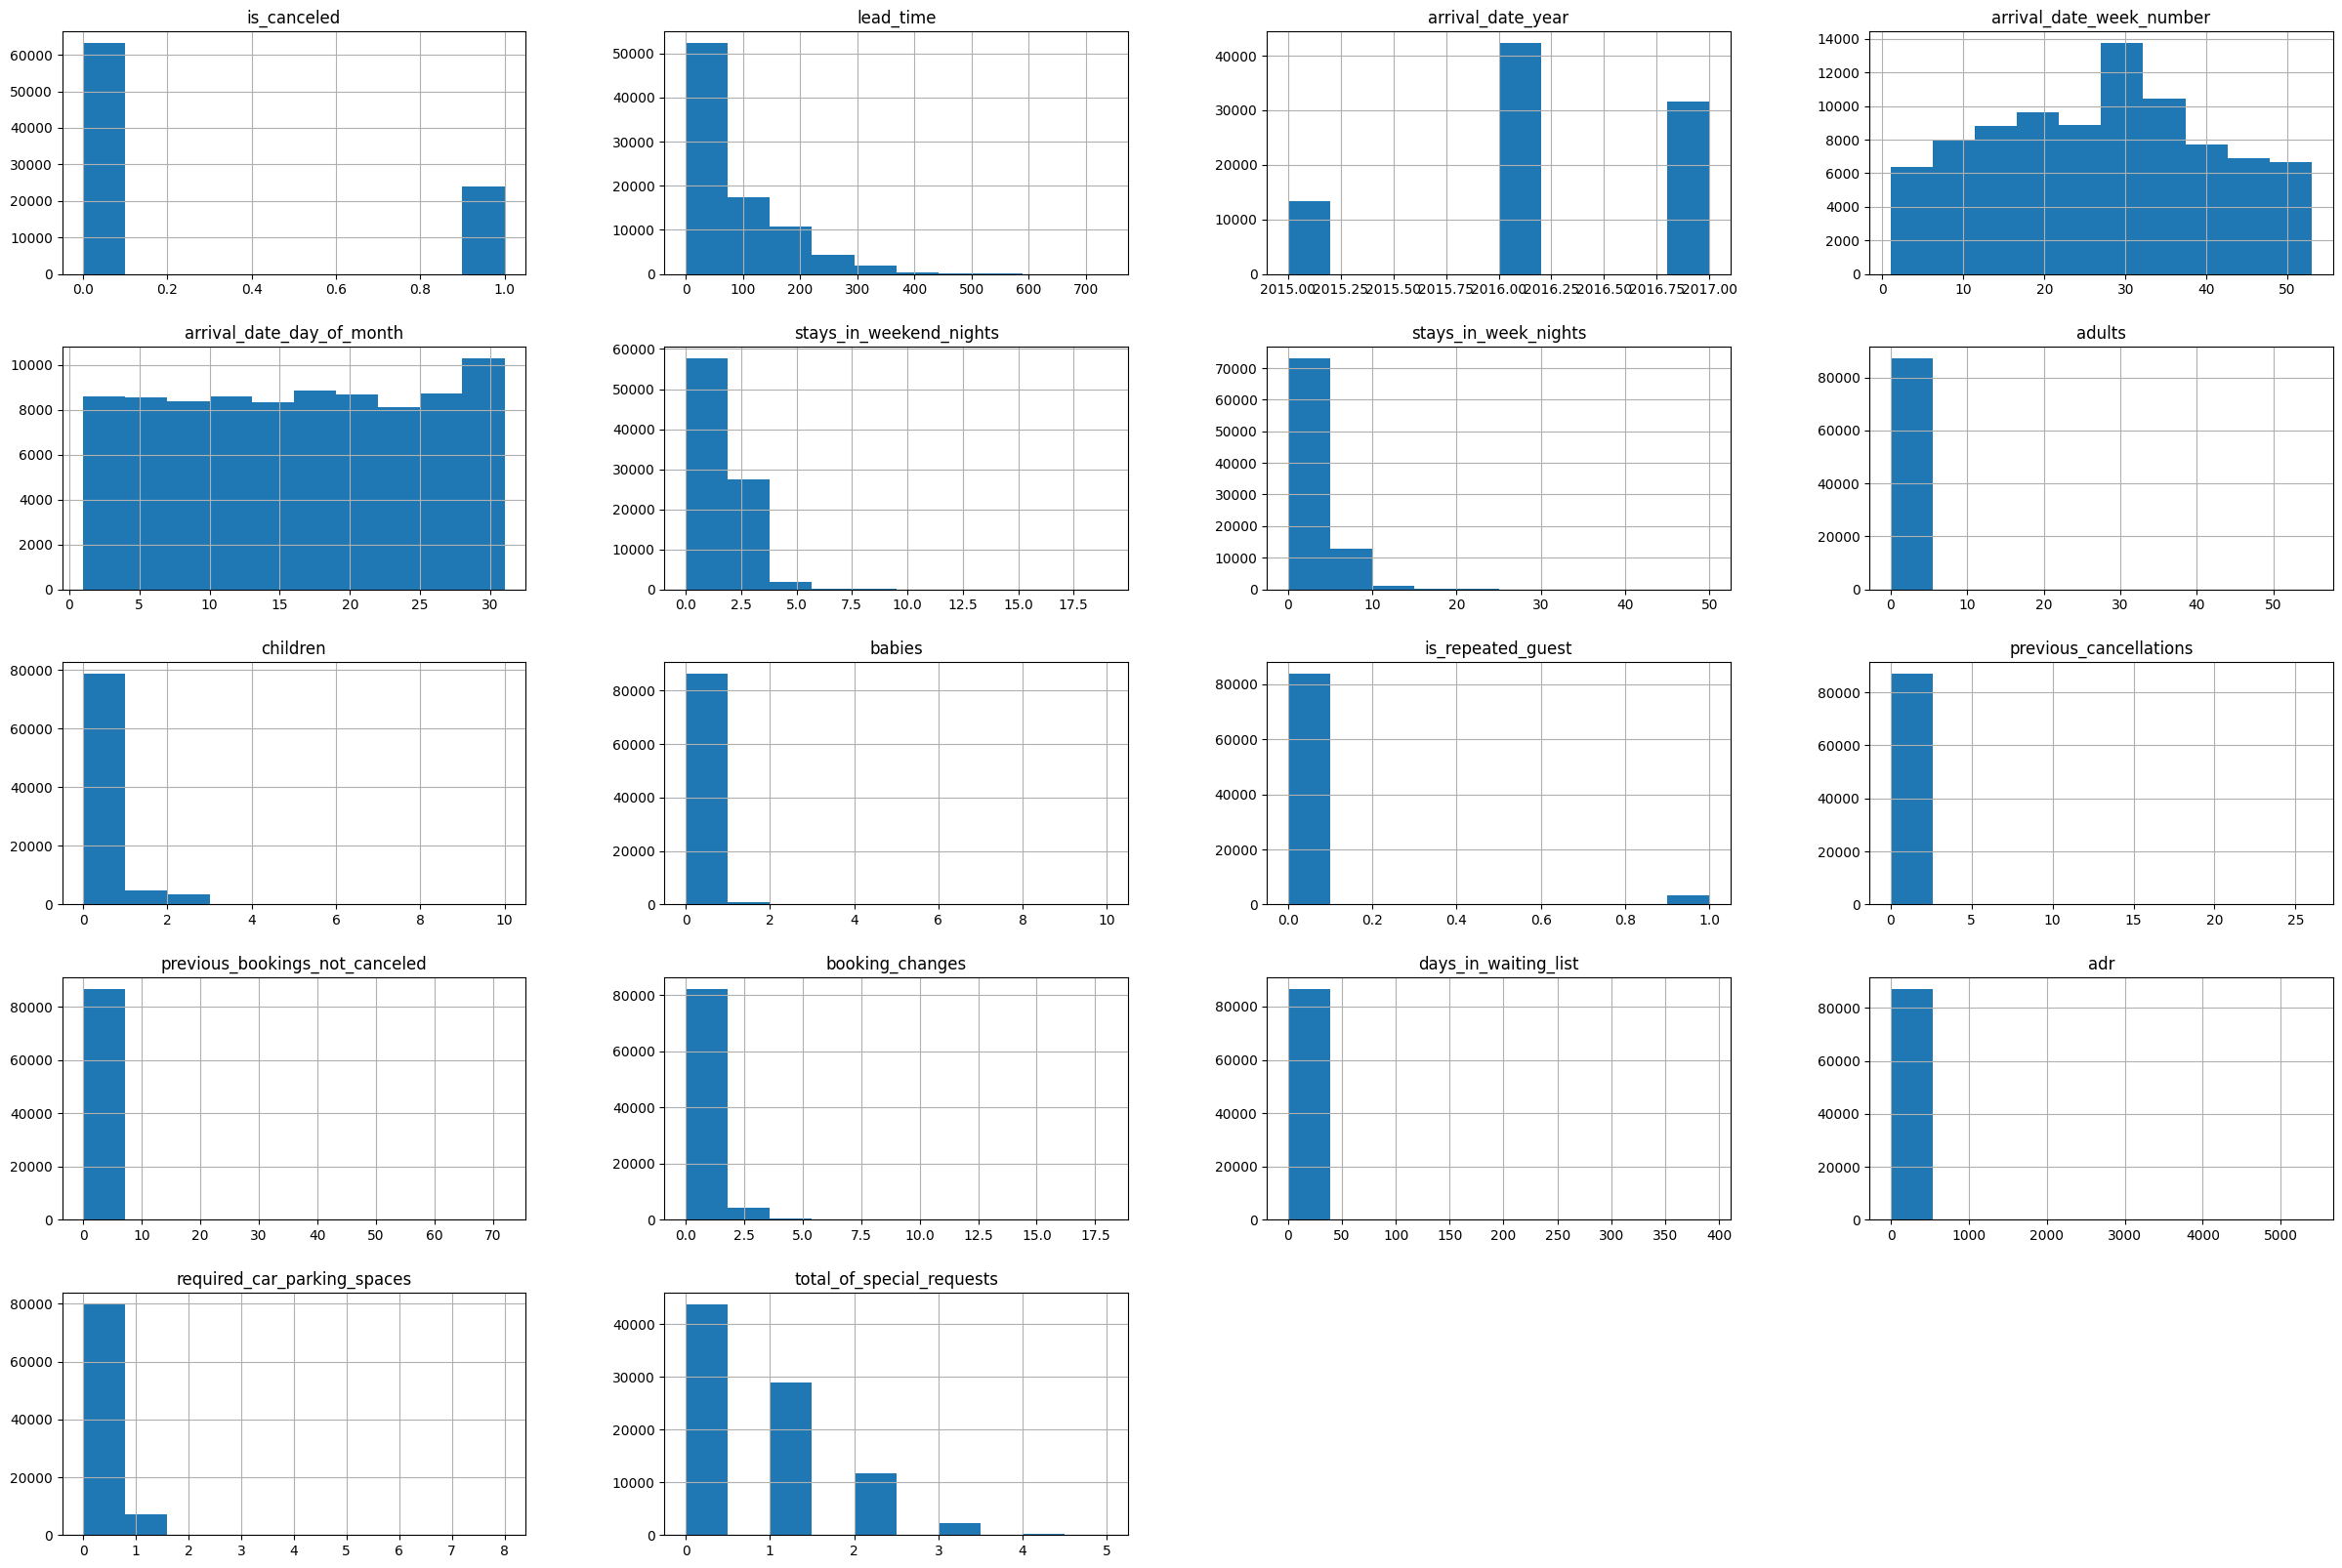

In [108]:
numerical_df.hist(figsize=(30,20))
plt.show()

### 3. EDA 2D

#### 3.1. Analyze correlation coefficients between numerical variables

<Axes: >

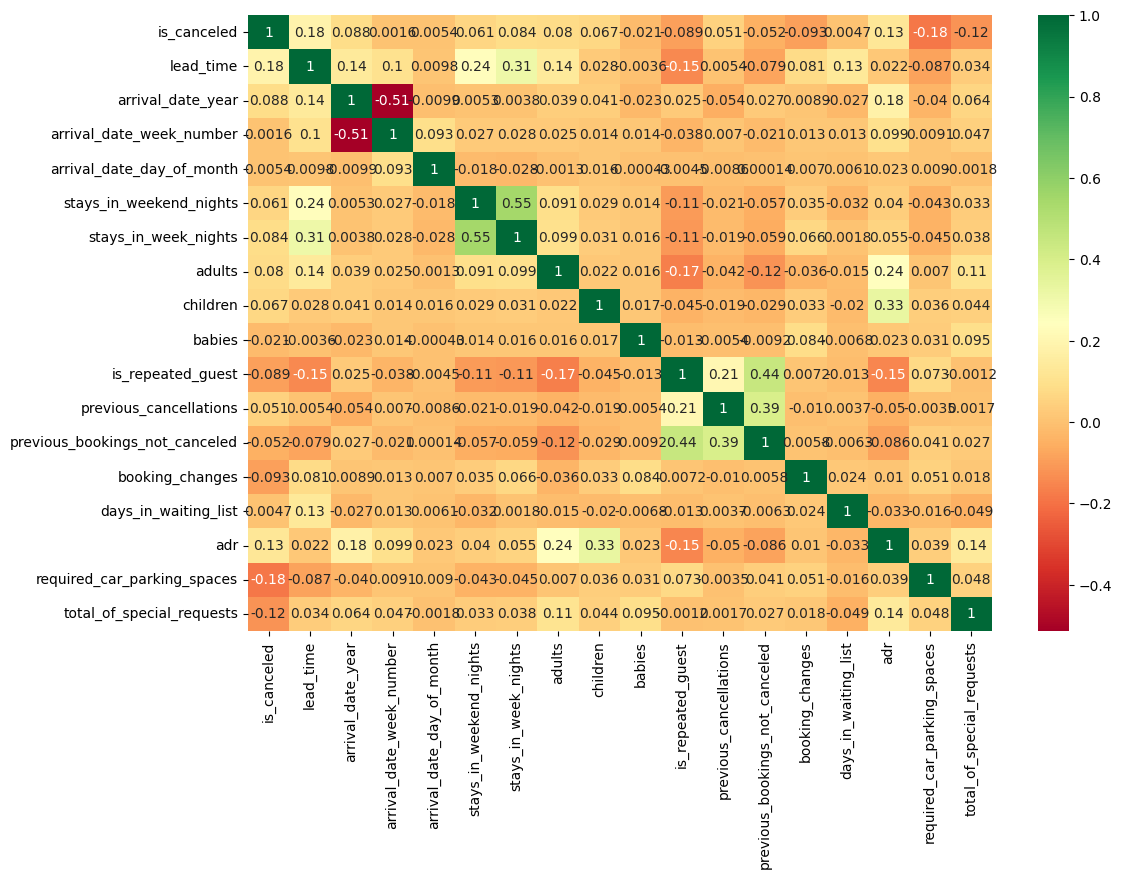

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(numerical_df.corr(),annot=True,cmap='RdYlGn')

#### 3.2. Leverage Scatter plot to analyze 2D data

##### `Advanced booking` vs `Daily Rate`

In [110]:
d = df.groupby(['hotel','lead_time']).agg({'adr': 'mean'}).rename(columns={'adr':'mean_adr'}).reset_index()

Text(0, 0.5, 'Daily Rate')

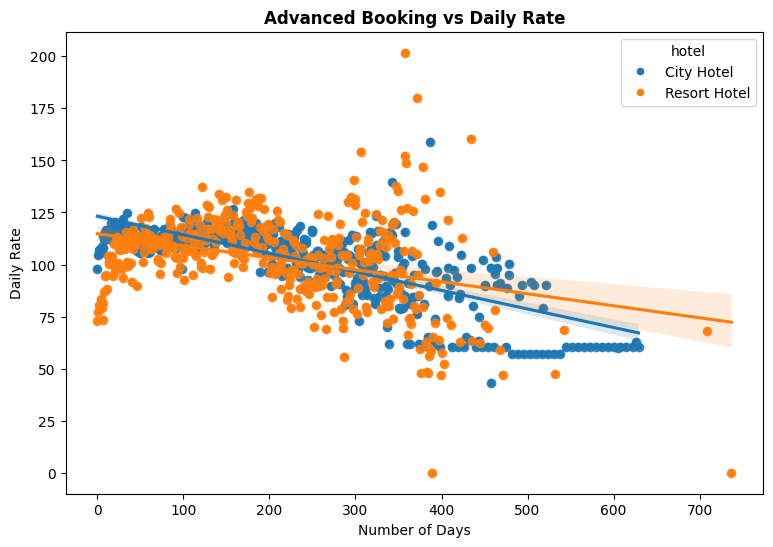

In [111]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='lead_time', y='mean_adr', hue='hotel', data=d)
plt.title("Advanced Booking vs Daily Rate", fontweight="bold")
sns.regplot(x='lead_time', y='mean_adr', data=d[d['hotel']=='City Hotel'])
sns.regplot(x='lead_time', y='mean_adr', data=d[d['hotel']=='Resort Hotel'])
plt.xlabel("Number of Days")
plt.ylabel("Daily Rate")

**Comment:** Not very strong but there is a downward trend that longer lead time have less daily rate

##### Effect of `Lead time` on `Cancellations`

In [112]:
d = df.groupby('lead_time').agg({'is_canceled':'sum', 'hotel':'count'}).reset_index().rename(columns={'is_canceled':'cancelled_bookings', 'hotel':'total_bookings'})
d['cancellation_percentage'] = (d['cancelled_bookings']/d['total_bookings'])*100
d.head()

,lead_time,cancelled_bookings,total_bookings,cancellation_percentage
0,0,346,5901,5.863413
1,1,211,3200,6.593750
2,2,182,1921,9.474232
3,3,170,1702,9.988249
4,4,153,1564,9.782609


Text(0.5, 1.0, 'Effect of Lead time on Cancellations')

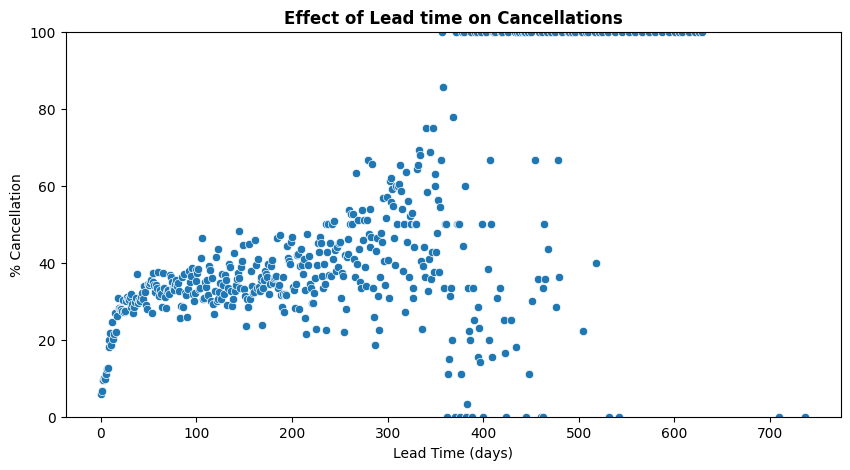

In [113]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time', y='cancellation_percentage', data=d)
plt.ylim((0,100))
plt.xlabel("Lead Time (days)")
plt.ylabel("% Cancellation")
plt.title("Effect of Lead time on Cancellations", fontweight="bold")

**Comment:** It seems there is a direct proportional relationship between lead time and cancellations. The higher the lead time, the greater the percentage of cancellations may be.

#### 3.3. Use bar charts to analyze data that combines numerical and categorical data

##### Ariving year, Leadtime, and Cancelations

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

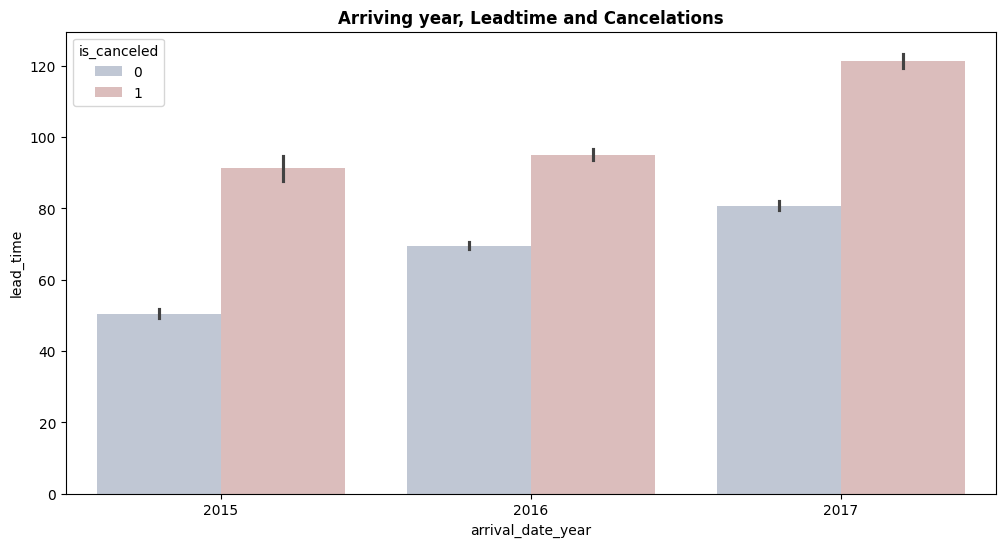

In [114]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations', fontweight="bold")

**Comments**: For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

##### Cancelation rates in Hotel types

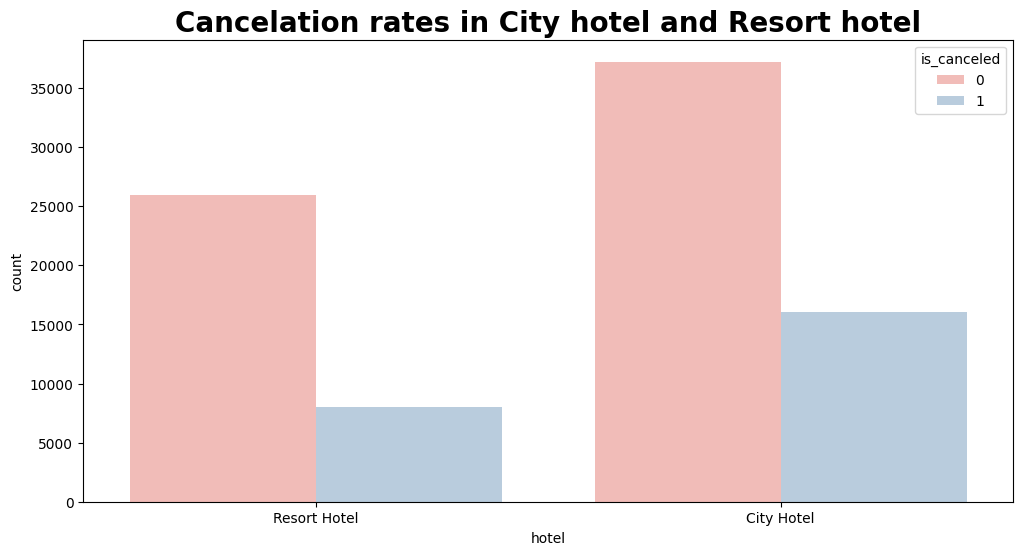

In [115]:
plt.figure(figsize=(12, 6))

sns.countplot(x='hotel',hue="is_canceled", data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

**Comments**: 
- Most bookings were in City hotel
- Cancelations in Resort hotel is less compared to City hotel

##### Arrivals in month and year

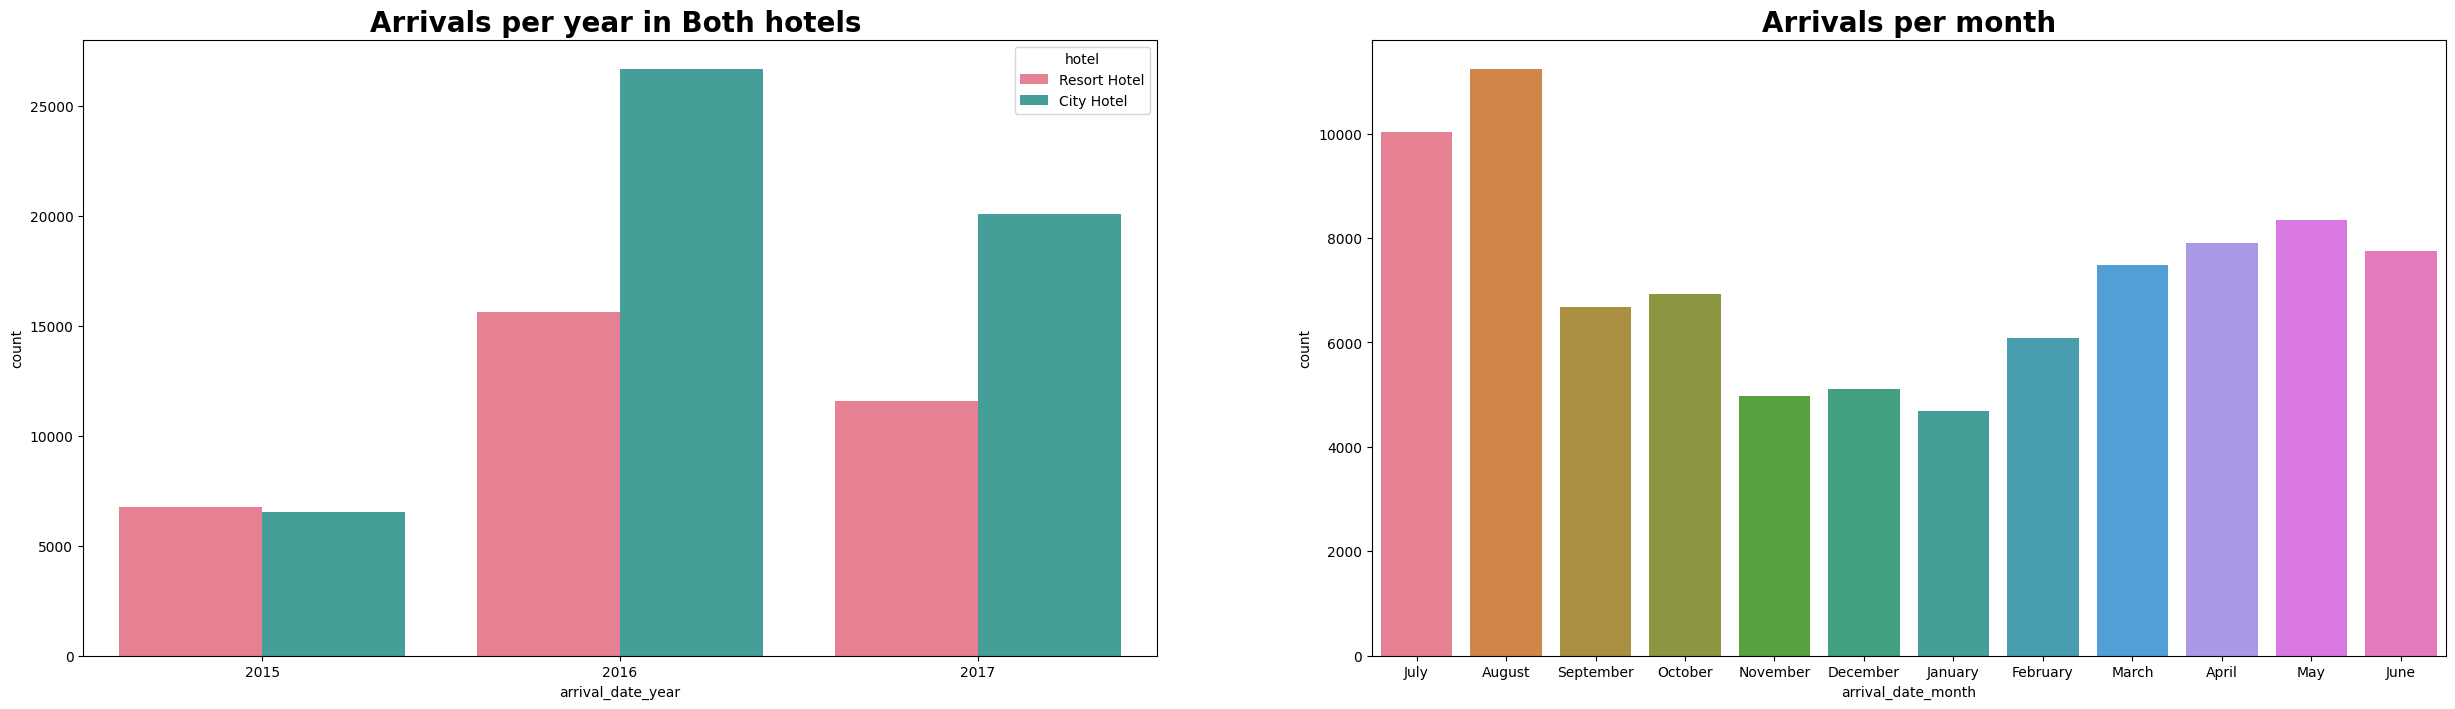

In [116]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'arrival_date_month', palette='husl')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

**Comments**: 
- We can see most of the bookings were in the year 2016 and bookings were doine in City hotel
- Most bookings were done in the month of May,June, July, August

##### Arrivals Date

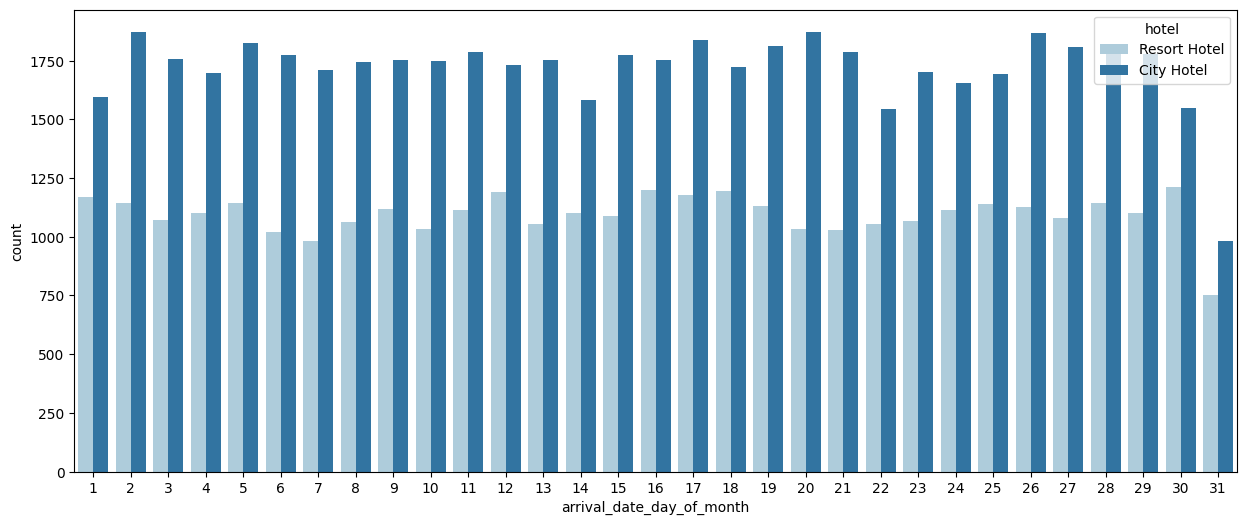

In [117]:
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

**Comments**: 
- Month end day has very less arrivals
- Bookings are more in City hotel

##### Weekend Stay

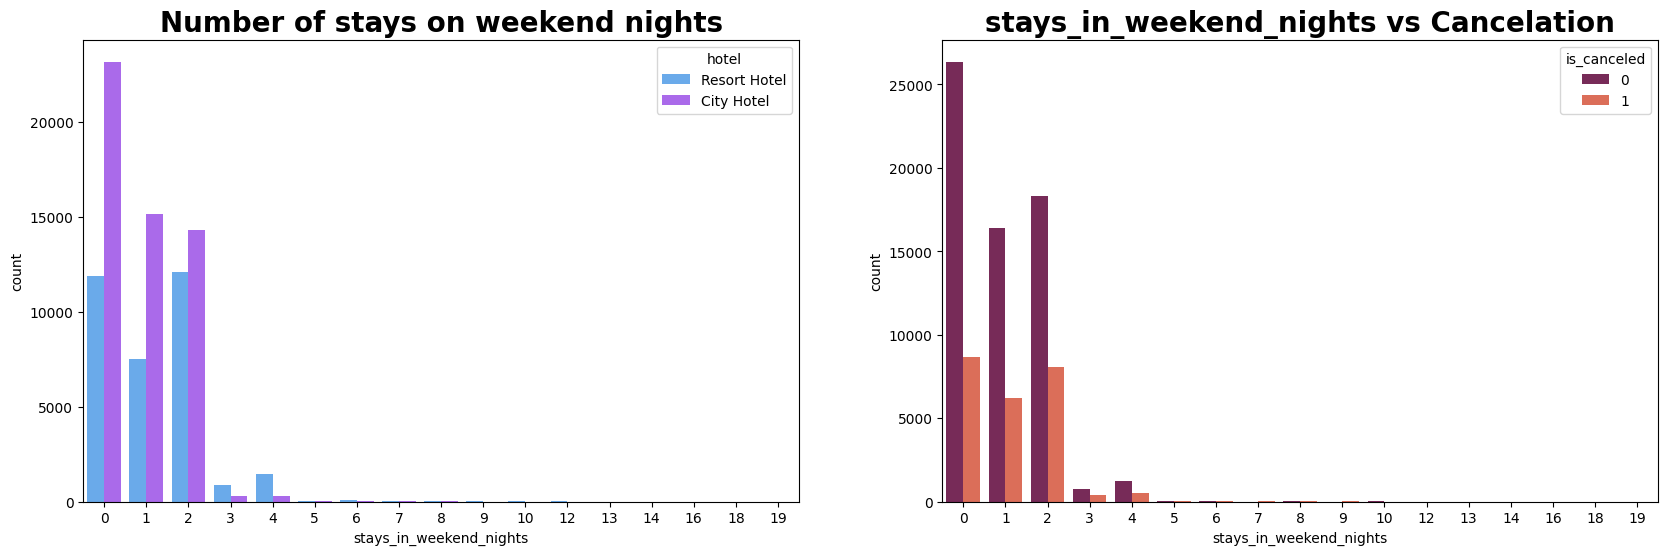

In [118]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('stays_in_weekend_nights vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

**Comments**: 
- In the first graph we can see that most of the weekend nights were booked in City Hotel
- Second plot shows most of weekend nights which were booked were not canceled

##### WeekStay

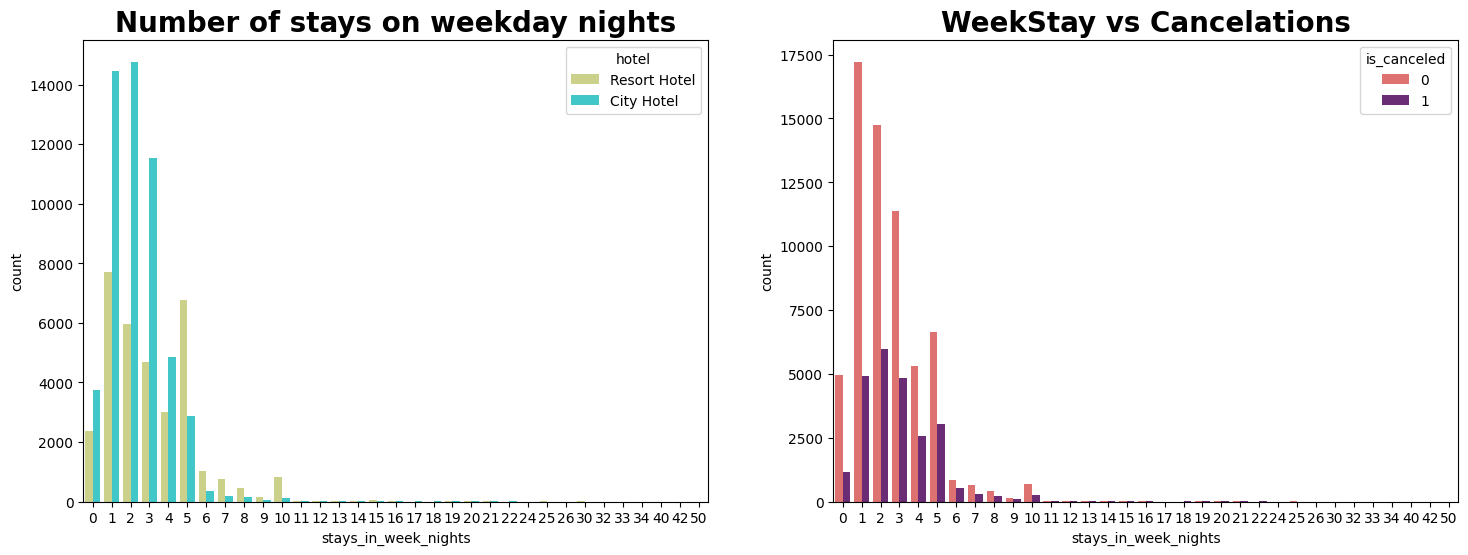

In [119]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.5)
plt.show()

**Comments**: 
- Weekday night stays were more in City Hotel
- Less cancelations were observed

##### Adult

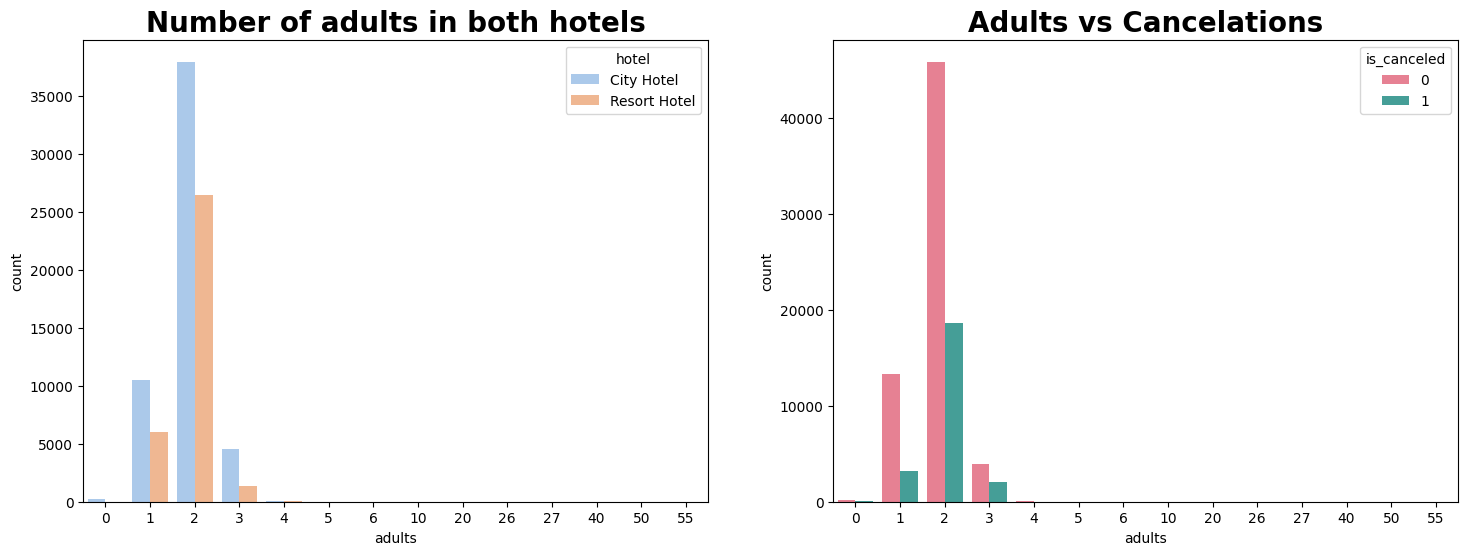

In [120]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=df, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'adults', hue='is_canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.5)


plt.show()

**Comments**: 
Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

##### Children

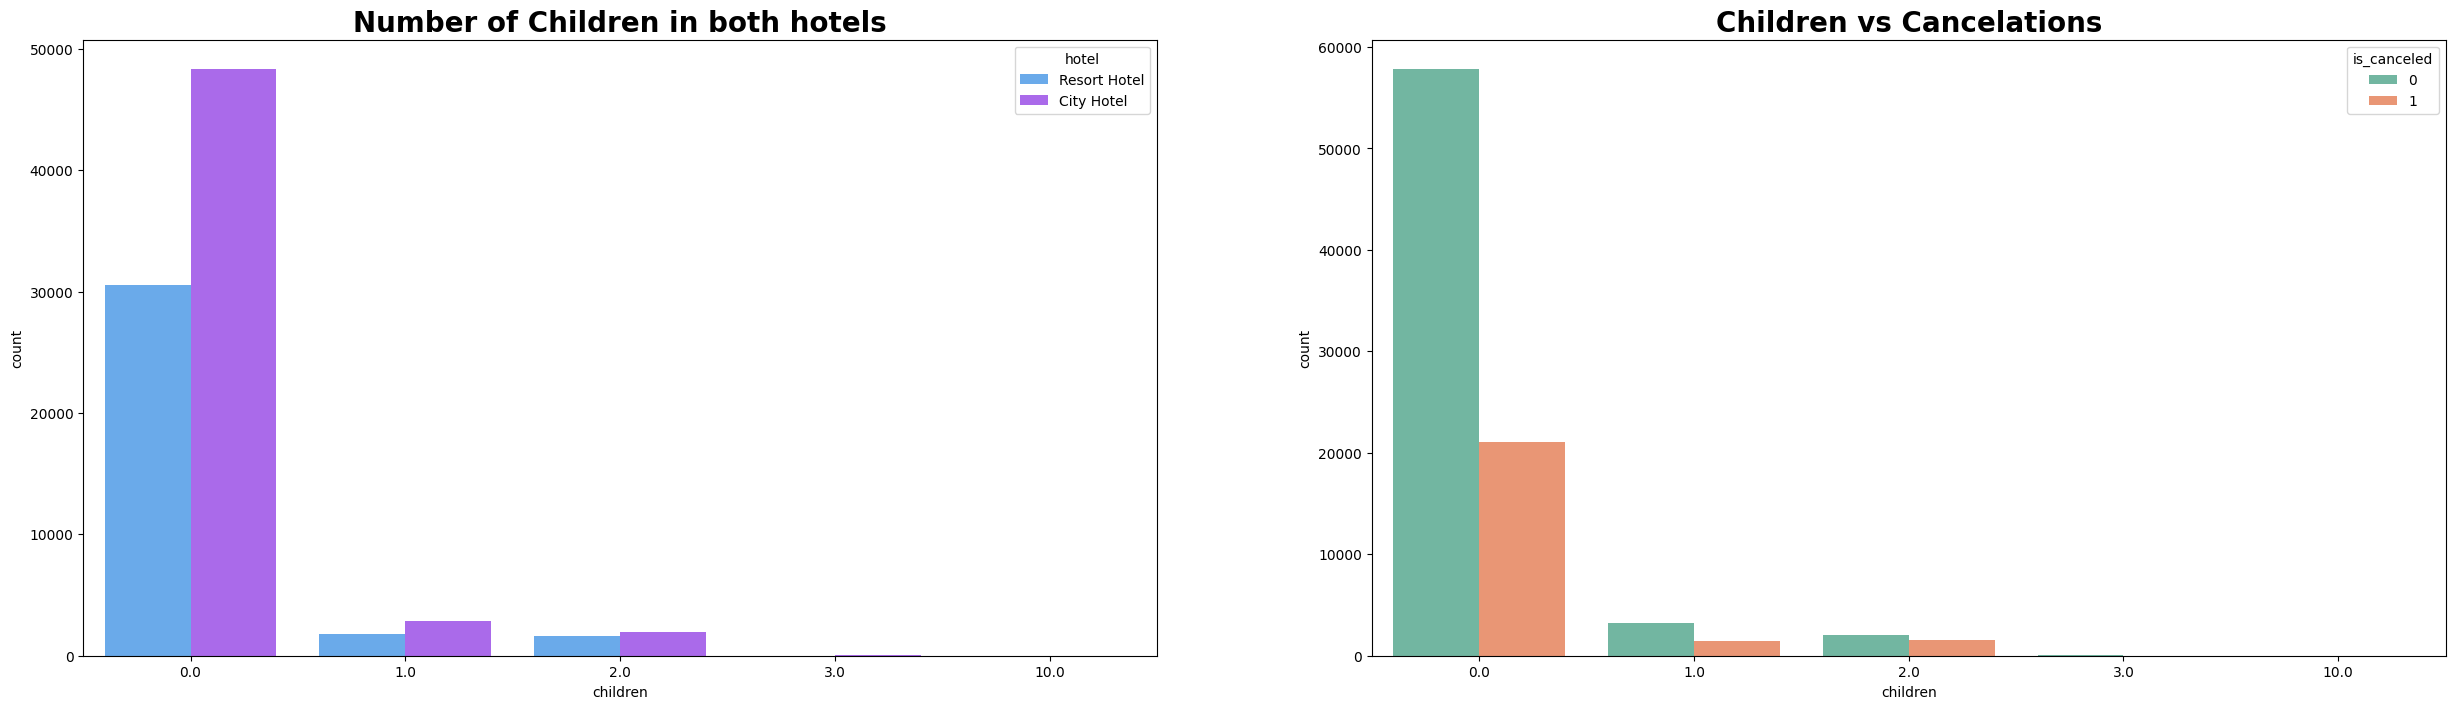

In [121]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='children',hue='hotel', data=df, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'children', hue='is_canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()


##### Babies

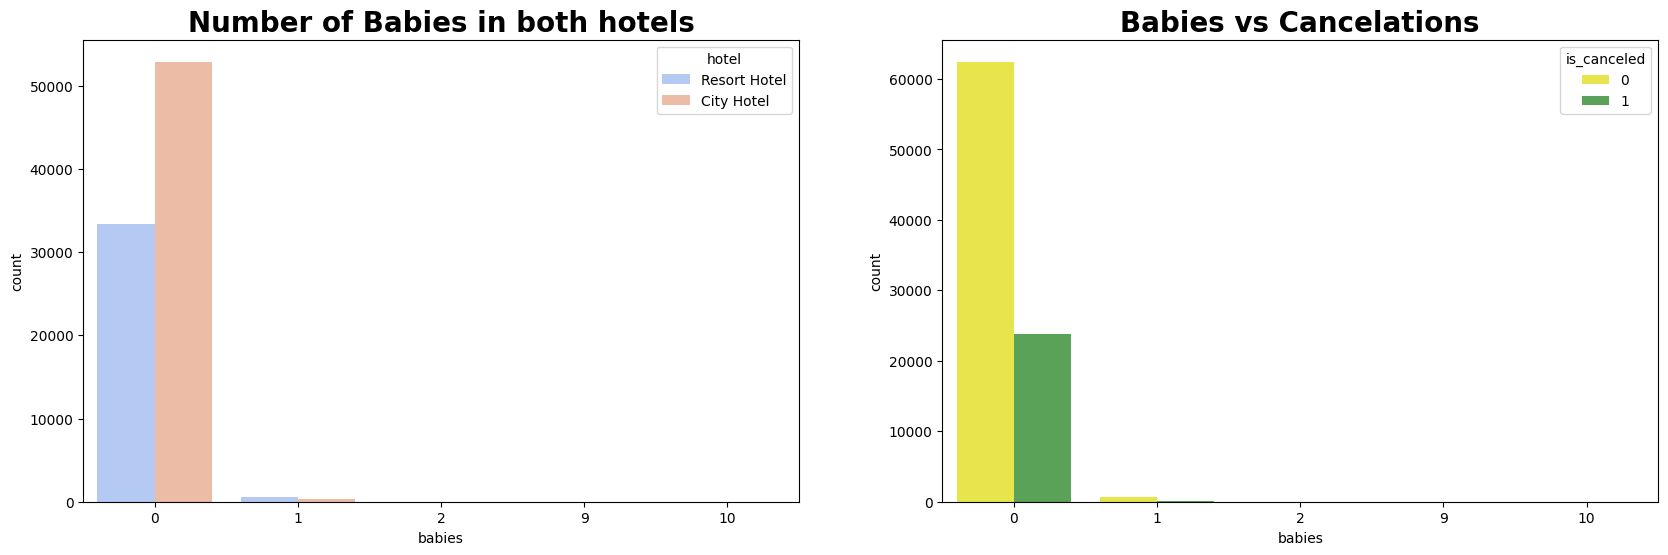

In [122]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='babies',hue='hotel', data=df, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'babies', hue='is_canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

**Comments**: 
- Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel
- Visitors who had 1 or 2 children also preferred city hotel

##### Market

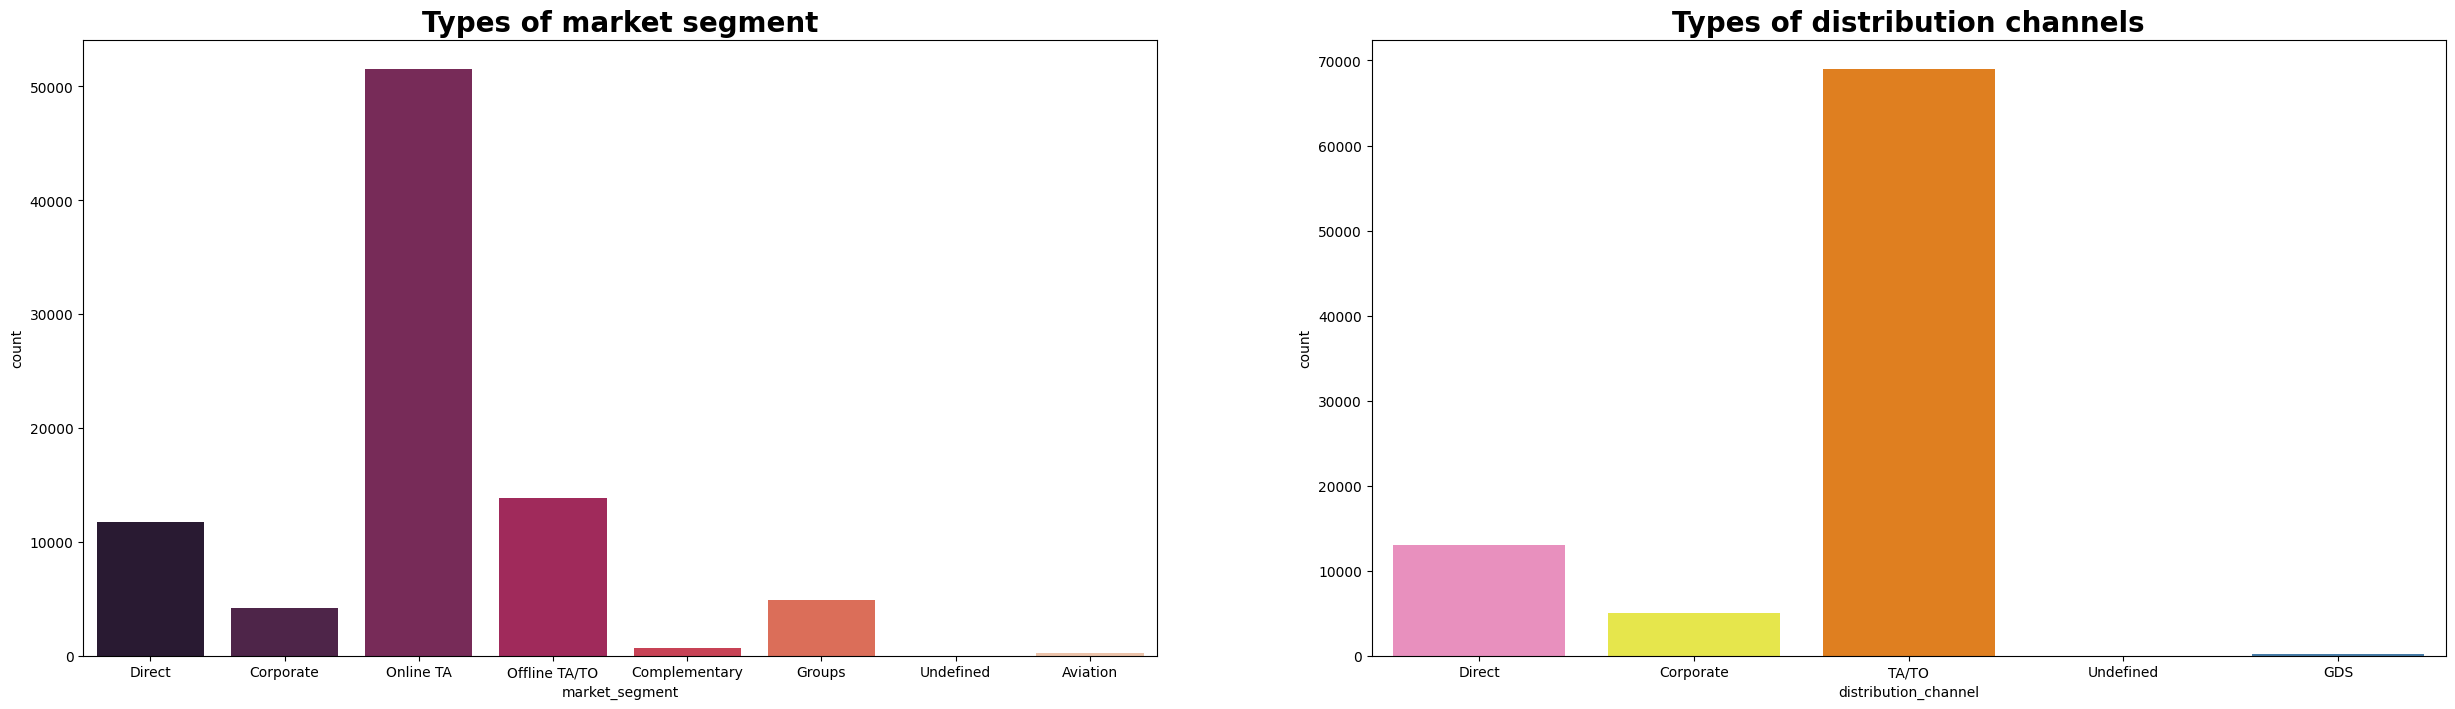

In [123]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

**Comments**: 
Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this

##### Deposit

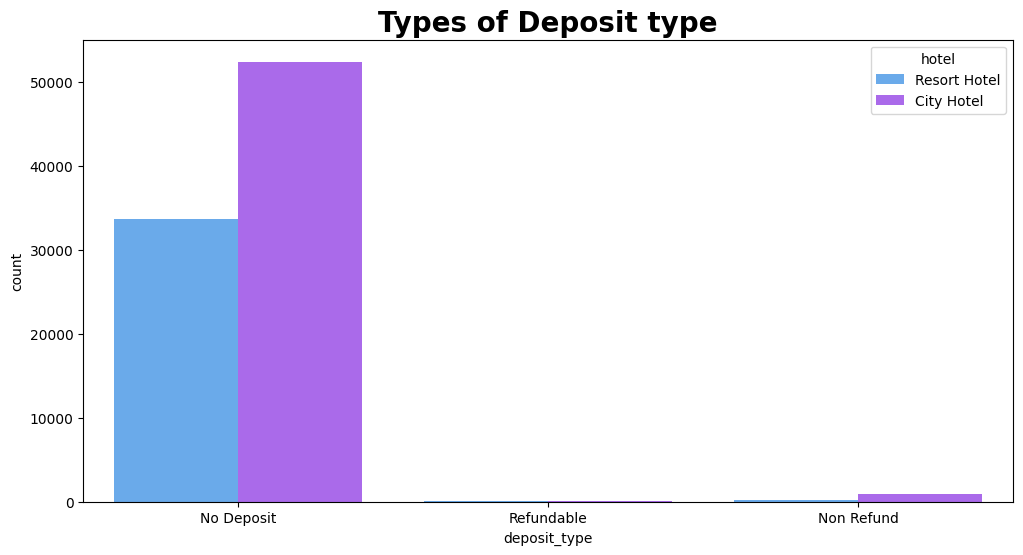

In [124]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

**Comments**: 
There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

#### 3.4. Calculate the density for two categorical variables

##### Deposit Types Across Hotel Types

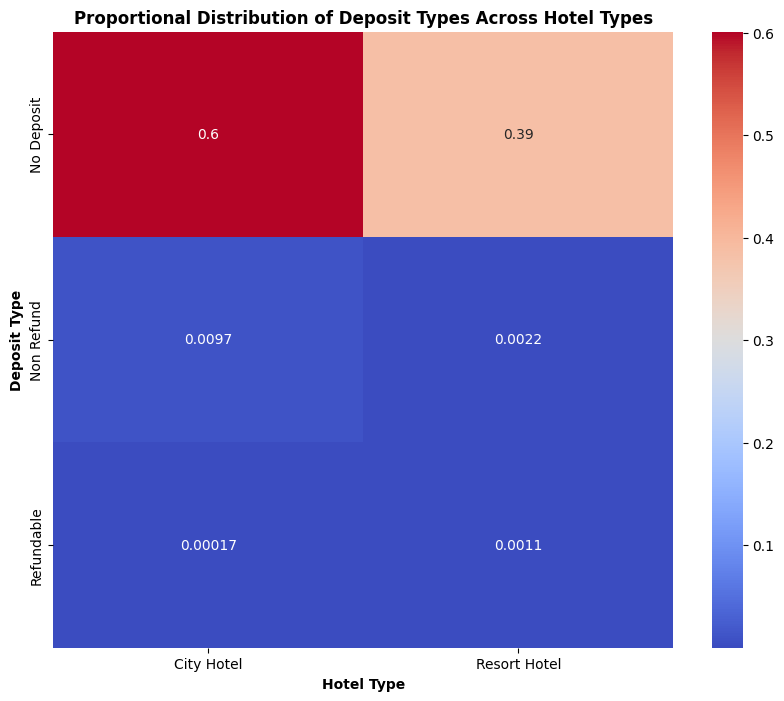

In [125]:
cross_tab = pd.crosstab(df['deposit_type'], df['hotel'], normalize='all')

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Proportional Distribution of Deposit Types Across Hotel Types', fontweight="bold")
plt.xlabel('Hotel Type', fontweight="bold")
plt.ylabel('Deposit Type', fontweight="bold")
plt.show()

**Comments**:  Both types of hotels, City Hotel and Resort Hotel, tend to have No Deposit and the lowest Refundable rate.

##### Room Types Across Hotel Types

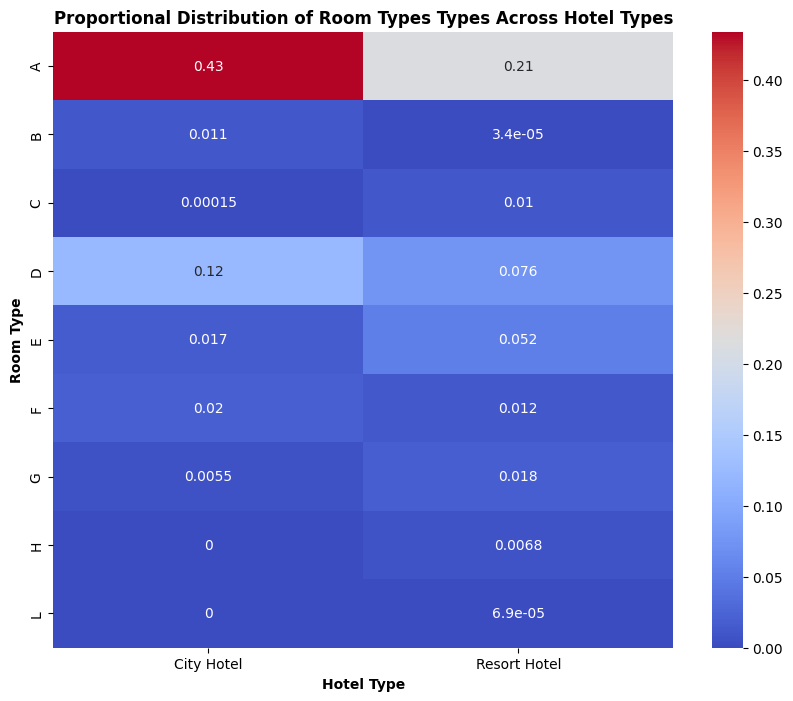

In [126]:
cross_tab = pd.crosstab(df['reserved_room_type'], df['hotel'], normalize='all')

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Proportional Distribution of Room Types Types Across Hotel Types', fontweight="bold")
plt.xlabel('Hotel Type', fontweight="bold")
plt.ylabel('Room Type', fontweight="bold")
plt.show()

**Comments**:  Most of guests reserves rooms of type `A`, also significant number of guests also reserves room type `D` & `E`. Demand for rest types are very minimal.

##### Customer Types Across Hotel Types

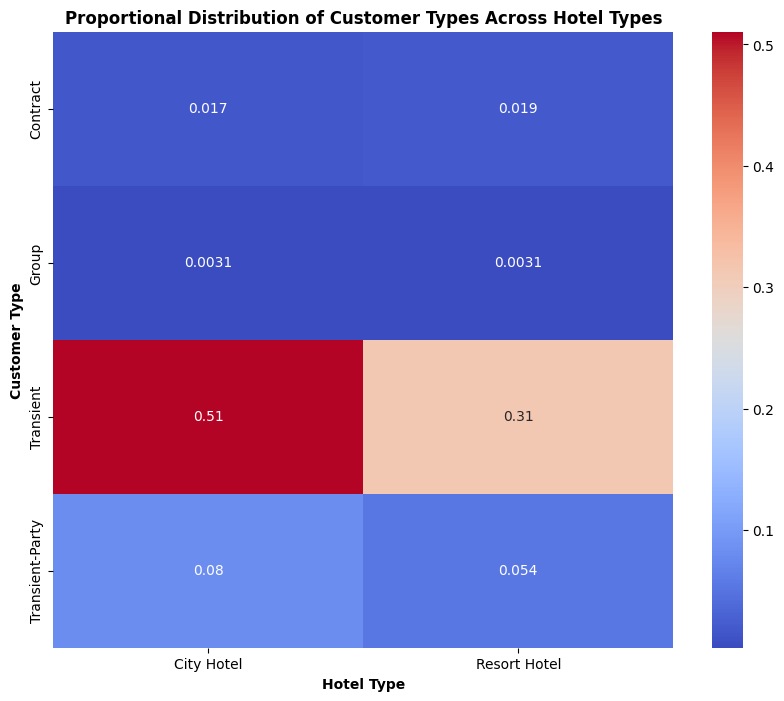

In [127]:
cross_tab = pd.crosstab(df['customer_type'], df['hotel'], normalize='all')

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Proportional Distribution of Customer Types Across Hotel Types', fontweight="bold")
plt.xlabel('Hotel Type', fontweight="bold")
plt.ylabel('Customer Type', fontweight="bold")
plt.show()

**Comments**:  The majority of hotel bookings are made by `Transient` customers, while other customer types constitute a very small percentage.

##### Level of Required Car Sparking Spaces Across Hotel Types

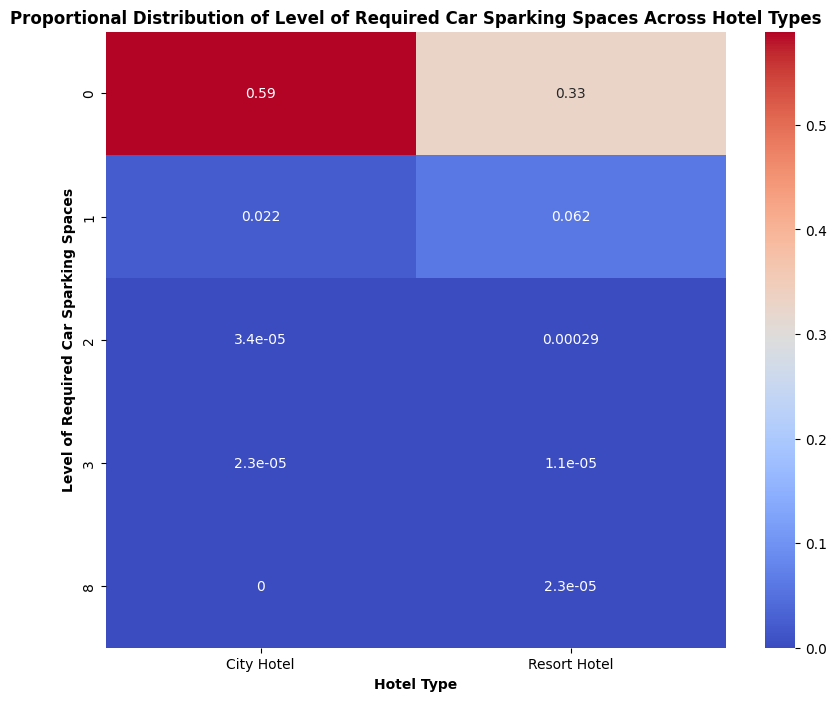

In [128]:
cross_tab = pd.crosstab(df['required_car_parking_spaces'], df['hotel'], normalize='all')

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Proportional Distribution of Level of Required Car Sparking Spaces Across Hotel Types', fontweight="bold")
plt.xlabel('Hotel Type', fontweight="bold")
plt.ylabel('Level of Required Car Sparking Spaces', fontweight="bold")
plt.show()

**Comments**:  We observe that most guests do not require parking space and constitute a small proportion of guests needing parking space for 1 car

### 4. EDA 3D

#### 4.1. 3D data analysis for three numerical variables

First let's define the function `create_3d_scatter_plot` generates a 3D scatter plot using three specified features from a given dataset. It visualizes the relationships between these features in a 3D space, with additional surfaces representing the minimum values along each axis. 

In [129]:
def create_3d_scatter_plot(feature1, feature2, feature3, data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Color by a fourth variable (if available)

    sc = ax.scatter(data[feature1], data[feature2], data[feature3], s=50, marker='o')

    ax.set_xlabel(feature1, fontsize=10, fontweight='bold')
    ax.set_ylabel(feature2, fontsize=10, fontweight='bold')
    ax.set_zlabel(feature3, fontsize=10, fontweight='bold')
    
    # ax.view_init(elev=0, azim=-0)

    plt.title(f'3D Scatter Plot of {feature1}, {feature2}, and {feature3}', fontsize=14, fontweight='bold')
    
    
    x = np.linspace(*ax.get_xlim(), 2)
    y = np.linspace(*ax.get_ylim(), 2)
    z = np.linspace(*ax.get_zlim(), 2)
    X, Z = np.meshgrid(x, z)
    Y = np.array([[y.min()]*len(x)]*len(z))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.05)
    Y, Z = np.meshgrid(y, z)
    X = np.array([[x.min()]*len(y)]*len(z))
    ax.plot_surface(X, Y, Z, color='g', alpha=0.05)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[z.min()]*len(x)]*len(y))
    ax.plot_surface(X, Y, Z, color='b', alpha=0.05)

    plt.show()


##### Booking changes, Weekend Stays, and Weeknight Stays

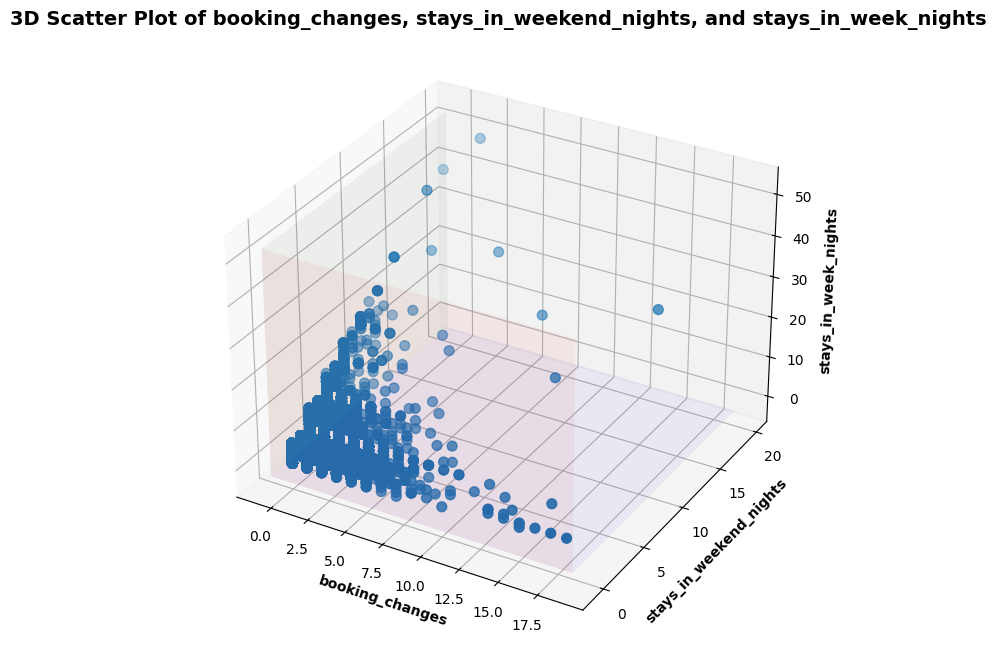

In [130]:
create_3d_scatter_plot('booking_changes', 'stays_in_weekend_nights', 'stays_in_week_nights', df)

**Comments**:  
- It appears that there is a slight trend indicating that as the number of booking changes increases, guests tend to have fewer stays in weekend nights. Meanwhile, there seems to be a trend that as booking changes increase, guests tend to have higher stays in week nights.

- Individuals who tend to stay during week nights tend to have a higher proportion of stays during weekend nights.

##### Lead Time, Previous Cancellations, and Booking Changes

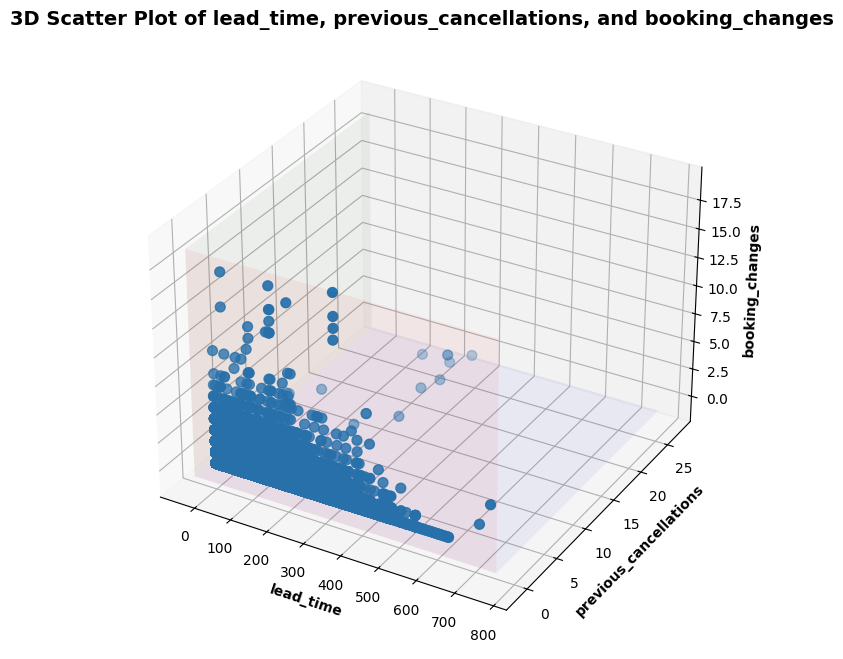

In [131]:
create_3d_scatter_plot('lead_time', 'previous_cancellations', 'booking_changes', df)

**Comments**: 
- There is a slight inverse trend between previous_cancellations and lead_time. As lead_time increases, the proportion of previous_cancellations decreases significantly, almost to zero.

- It is evident that as lead_time increases, booking_changes tend to decrease significantly.

#### 4.2. 2D for two numerical and color for categorical variables

In [132]:
df_new = df.copy()
df_new['days_stayed'] = df_new.stays_in_weekend_nights+df_new.stays_in_week_nights

##### Number of Days Stayed vs. Daily Rate by Hotel

Text(0.5, 1.0, 'Number of days stayed vs Daily Rate')

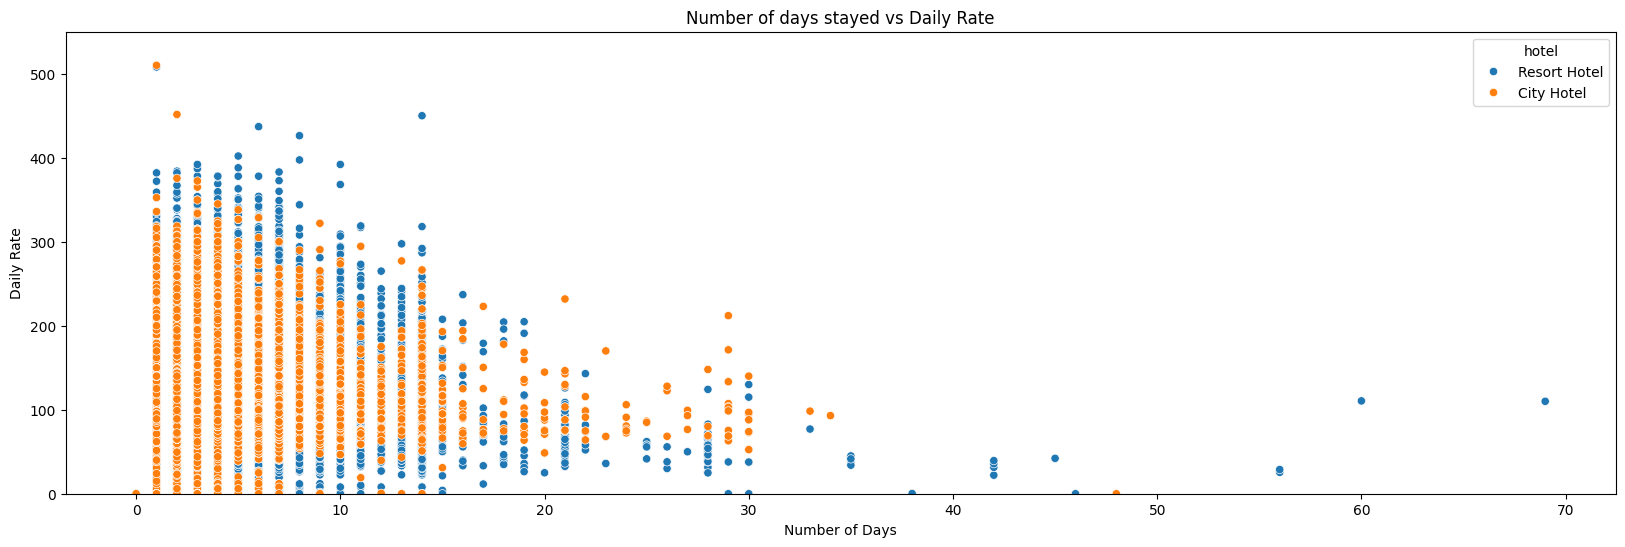

In [133]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='days_stayed', y='adr', hue='hotel', data=df_new)
plt.xlabel("Number of Days")
plt.ylabel("Daily Rate")
plt.ylim(0, 550) # avoid outliers
plt.title("Number of days stayed vs Daily Rate")

**Comments:** Although smaller lead time bookings has wide range of daily rates from cheap to expensive, but still there seems a downward trend that longer stay time leads to less daily rate.

#### 4.3. Calculate proportion by bin divided by category with two cate variables

##### Aggregated Statistics for Car Parking Spaces and Special Requests by Hotel

In [134]:
df.groupby('hotel').agg({'required_car_parking_spaces': ['min', 'mean', 'std', 'max'], 'total_of_special_requests': ['min', 'mean', 'std', 'max']})

required_car_parking_spaces                          \
                                     min      mean       std max   
hotel                                                              
City Hotel                             0  0.035618  0.186246   3   
Resort Hotel                           0  0.160765  0.373996   8   

             total_of_special_requests                          
                                   min      mean       std max  
hotel                                                           
City Hotel                           0  0.711491  0.833709   5  
Resort Hotel                         0  0.679443  0.829178   5

**Comments:** 
- On average, guests at the City Hotel tend to require fewer car parking spaces (`mean = 0.036`) compared to guests at the Resort Hotel (`mean = 0.161`).
- Guests at both hotels tend to make special requests, with higher average values observed at the City Hotel (`mean = 0.711`) compared to the Resort Hotel (`mean = 0.679`).

##### Aggregating Previous Cancellation and Previous Booking Not Cancellation Metrics by Customer Type

In [135]:
df.groupby('customer_type').agg({'previous_cancellations': ['min', 'mean', 'std', 'max'], 'previous_bookings_not_canceled': ['min', 'mean', 'std', 'max']})

previous_cancellations                          \
                                   min      mean       std max   
customer_type                                                    
Contract                             0  0.065072  0.247982   2   
Group                                0  0.029575  0.190160   2   
Transient                            0  0.027880  0.361359  26   
Transient-Party                      0  0.036714  0.443799  24   

                previous_bookings_not_canceled                          
                                           min      mean       std max  
customer_type                                                           
Contract                                     0  0.005423  0.081678   2  
Group                                        0  0.622921  1.661701  20  
Transient                                    0  0.202748  1.844475  72  
Transient-Party                              0  0.097133  1.160692  50

**Comments:**
- Customers of all types tend to have very low previous cancellation rates on average, with means ranging from `0.027 to 0.065`.

- The highest mean number of previous cancellations is observed for customers categorized as Contract (`mean = 0.065`), followed by Transient-Party customers (`mean = 0.037`).

- Transient customers have the lowest mean number of previous cancellations (`mean = 0.027`) among the different customer types.

- Customers of the Group type have the highest mean number of previous bookings not canceled (`mean = 0.623`), indicating relatively higher mean number of previous bookings not canceled than the other customers type.

### 5. Insights

There are total `21` insights can be extracted from sections above.

1. Not very strong but there is a downward trend that longer lead time have less daily rate (section `3.2` - `Advanced booking` vs `Daily Rate`).

2. It seems there is a direct proportional relationship between lead time and cancellations. The higher the lead time, the greater the percentage of cancellations may be. (section `3.2` - Effect of `Lead time` on `Cancellations`).

3. For all the 3 years (2015, 2016 and 2017), bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled. (section `3.3` - `Ariving year, Leadtime, and Cancelations`).

4. Most bookings were in City hotel. Cancelations in Resort hotel is less compared to City hotel (section `3.3` - `Cancelation rates` in `Hotel types`).

5. We can see most of the bookings were in the year 2016 and bookings were doine in City hotel. Most bookings were done in the month of May,June, July, August. (section `3.3` - `Arrivals` in `month` and `year`).

6. Month end day has very less arrivals. Bookings are more in City hotel (`3.3` - `Arrivals Date`).

7. In the first graph we can see that most of the weekend nights were booked in City Hotel. Second plot shows most of weekend nights which were booked were not canceled (section `3.3` - `Weekend Stay`).

8. Weekday night stays were more in City Hotel. Less cancelations were observed (section `3.3` - WeekStay).

9. Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings (section `3.3` - `Adult`).

10. Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel. Visitors who had 1 or 2 children also preferred city hotel (section `3.3` - `Children` vs `Babies`).

11. Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this (section `3.3` - `Market`).

12. There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings (section `3.3` - `Deposit`).

13. Both types of hotels, City Hotel and Resort Hotel, tend to have No Deposit and the lowest Refundable rate. (section `3.4` - `Deposit Types` Across `Hotel Types`).

14. Most of guests reserves rooms of type `A`, also significant number of guests also reserves room type `D` & `E`. Demand for rest types are very minimal. (section `3.4` - `Room Types` Across `Hotel Types`).

15. The majority of hotel bookings are made by `Transient` customers, while other customer types constitute a very small percentage. (section `3.4` - `Customer Types` Across `Hotel Types`).

16. We observe that most guests do not require parking space and constitute a small proportion of guests needing parking space for 1 car. (section `3.4` - `Level of Required Car Sparking Spaces` Across `Hotel Types`).

17. 
- It appears that there is a slight trend indicating that as the number of booking changes increases, guests tend to have fewer stays in weekend nights. Meanwhile, there seems to be a trend that as booking changes increase, guests tend to have higher stays in week nights.

- Individuals who tend to stay during week nights tend to have a higher proportion of stays during weekend nights.
(section `4.1` - `Booking changes`, `Weekend Stays`, and `Weeknight Stays`)

18. 
- There is a slight inverse trend between previous_cancellations and lead_time. As lead_time increases, the proportion of previous_cancellations decreases significantly, almost to zero.

- It is evident that as lead_time increases, booking_changes tend to decrease significantly.
(section `4.1` - `Lead Time`, `Previous Cancellations`, and `Booking Changes`)

19. Although smaller lead time bookings has wide range of daily rates from cheap to expensive, but still there seems a downward trend that longer stay time leads to less daily rate. (section `4.2` - `Number of Days Stayed` vs. `Daily Rate` by `Hotel`).

20. 
- On average, guests at the City Hotel tend to require fewer car parking spaces (`mean = 0.036`) compared to guests at the Resort Hotel (`mean = 0.161`).
- Guests at both hotels tend to make special requests, with higher average values observed at the City Hotel (`mean = 0.711`) compared to the Resort Hotel (`mean = 0.679`). 
(section `4.3` - Aggregated Statistics for `Car Parking Spaces` and `Special Requests` by `Hotel`)

21. 
- Customers of all types tend to have very low previous cancellation rates on average, with means ranging from `0.027 to 0.065`.

- The highest mean number of previous cancellations is observed for customers categorized as Contract (`mean = 0.065`), followed by Transient-Party customers (`mean = 0.037`).

- Transient customers have the lowest mean number of previous cancellations (`mean = 0.027`) among the different customer types.

- Customers of the Group type have the highest mean number of previous bookings not canceled (`mean = 0.623`), indicating relatively higher mean number of previous bookings not canceled than the other customers type.
(section `4.3` - Aggregating `Previous Cancellation` and `Previous Booking Not Cancellation` Metrics by `Customer Type`).


### 6. References

[1] [Dataset: Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

[2] [MyHotel.ipynb of truongcntn2017](https://github.com/truongcntn2017/DataVisualization/blob/main/MyHotel.ipynb)

[3] [Hotel Booking Demand EDA/ Data Visualisation of JESSE MOSTIPAK](https://www.kaggle.com/code/shrutidandagi/hotel-booking-demand-eda-data-visualisation)

[4] [EDA and Visualizations on Hotel Booking Dataset of AYUSH KUMAR](https://www.kaggle.com/code/ayushkumar930/eda-and-visualizations-on-hotel-booking-dataset)

[5] [3D Scatterplot of Matplotlib](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

[6] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.pdf)

---
## <center>THE END</center>

## <center>THANK YOU</center>